In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

In [2]:
# 한글 깨짐 방지
import matplotlib
import matplotlib.font_manager as fm
# fm._rebuild()
fm.get_fontconfig_fonts()
font_location = 'C:/Users/ASIA-19/NanumGothic.ttf' # 폰트 파일 이름, 디렉토리 주의
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [5]:
file = r"C:\Users\ASIA-19\Downloads\clearfile_f.xlsx"
df = pd.read_excel(file, sheet_name="ver4")


In [6]:
print(df.head())

   사망      교통사고비용  사고시각_아침  사고시각_오후  사고시각_저녁    일일 교통량  일일 교통량 평균   일일 속도평균  \
0   0   5245000.0        0        0        1  0.684818   0.461806  0.786667   
1   0  26225000.0        0        0        1  0.684607   0.500000  0.906667   
2   0  20980000.0        0        1        0  0.669619   0.583333  0.840000   
3   0   5245000.0        0        0        0  0.669619   0.593750  0.866667   
4   0   5245000.0        0        0        1  0.669197   0.614583  0.800000   

   일일 속도75%  고속도로 교통량  ...  피해_화물  피해_그외  위험운전행동  주행거리당 사망수   시도별_진료비  \
0  0.175439  0.393140  ...      1      0     0.0   0.194969  1.000000   
1  0.263158  0.535620  ...      1      0     0.0   0.855346  0.794518   
2  0.192982  0.569921  ...      1      0     0.0   0.490566  0.425363   
3  0.201754  0.089710  ...      1      0     0.0   0.880503  0.291662   
4  0.192982  0.994723  ...      1      0     0.0   0.880503  0.291662   

   연령별_가해진료비  연령별_피해진료비     화물_관용    화물_자가용    화물_영업용  
0   0.023318   0.399606  0.091

In [7]:
#결측치 제거
df.isnull().sum()

사망              0
교통사고비용          0
사고시각_아침         0
사고시각_오후         0
사고시각_저녁         0
일일 교통량          0
일일 교통량 평균       0
일일 속도평균         0
일일 속도75%        0
고속도로 교통량        0
고속도로별 로드킬       0
요일_화            0
요일_수            0
요일_목            0
요일_금            0
요일_토            0
요일_일            0
제한차량_과적         0
제한차량_적불         0
승용평균일교통량        0
버스평균일교통량        0
화물평균일교통량.1      0
부상자수            0
차대차             0
단독차량            0
법규위반_기타         0
법규위반_불법유턴       0
법규위반_신호위반       0
법규위반_안전거리미확보    0
법규위반_안전운전불이행    0
법규위반_중앙         0
법규위반_차로위반       0
화물              0
가해연령대_20        0
가해연령대_30        0
가해연령대_40        0
가해연령대_50        0
가해연령대_60        0
가해연령대_70        0
가해연령대_80        0
피해_화물           0
피해_그외           0
위험운전행동          0
주행거리당 사망수       0
시도별_진료비         0
연령별_가해진료비       0
연령별_피해진료비       0
화물_관용           0
화물_자가용          0
화물_영업용          0
dtype: int64

In [8]:
print(df.columns)

Index(['사망', '교통사고비용', '사고시각_아침', '사고시각_오후', '사고시각_저녁', '일일 교통량', '일일 교통량 평균',
       '일일 속도평균', '일일 속도75%', '고속도로 교통량', '고속도로별 로드킬', '요일_화', '요일_수', '요일_목',
       '요일_금', '요일_토', '요일_일', '제한차량_과적', '제한차량_적불', '승용평균일교통량', '버스평균일교통량',
       '화물평균일교통량.1', '부상자수', '차대차', '단독차량', '법규위반_기타', '법규위반_불법유턴',
       '법규위반_신호위반', '법규위반_안전거리미확보', '법규위반_안전운전불이행', '법규위반_중앙', '법규위반_차로위반',
       '화물', '가해연령대_20', '가해연령대_30', '가해연령대_40', '가해연령대_50', '가해연령대_60',
       '가해연령대_70', '가해연령대_80', '피해_화물', '피해_그외', '위험운전행동', '주행거리당 사망수',
       '시도별_진료비', '연령별_가해진료비', '연령별_피해진료비', '화물_관용', '화물_자가용', '화물_영업용'],
      dtype='object')


In [9]:
# # 1.의사결정나무
from sklearn.ensemble import RandomForestClassifier

# # 기술 속성(descriptive features)
X = df.drop(['사망', '부상자수', '교통사고비용'], axis=1)
# # 대상 속성(target feature)
Y = df['사망']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,  stratify=Y)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2088, 47)
(2088,)
(523, 47)
(523,)


In [10]:
#데이터를 표준화 시킴
from sklearn.preprocessing import StandardScaler


#훈련용 뿐만 아니라 테스트용도 같이 

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [11]:
# DT 객체 생성 및 훈련
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [12]:
# 예측값 저장
Y_pred = dt_clf.predict(X_test)

In [13]:
import sklearn.metrics as mt

!pip install -U pandas-profiling

In [14]:
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=winddori2002&logNo=221659080425
# 학습결과 평가 

print('Train_Accuracy: ', dt_clf.score(X_train, Y_train),'\n')

accuracy = mt.accuracy_score(Y_test, Y_pred)
recall = mt.recall_score(Y_test, Y_pred)
precision = mt.precision_score(Y_test, Y_pred)
f1_score = mt.f1_score(Y_test, Y_pred)
matrix = mt.confusion_matrix(Y_test, Y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  1.0 

Accuracy:  0.85 

Recall:  0.14 

Precision:  0.12 

F1_score:  0.13 

Confusion Matrix: 
 [[438  42]
 [ 37   6]]


학습 데이터에서는 100%의 정확도, 테스트에서는 80%의 정확도

In [15]:
# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, X, Y, cv = 5)
scores

pd.DataFrame(cross_validate(dt_clf, X, Y, cv =5))
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.8104151557108634


In [16]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

dt_clf = DecisionTreeClassifier(random_state=33)
parameters = {'max_depth': [3, 5, 7],
              'min_samples_split': [3, 5],
              'splitter': ['best', 'random']}

grid_dt = GridSearchCV(dt_clf, # estimator 객체,
                      param_grid = parameters, cv = 5,
                      # n_jobs = -1: 모든 cpu를 사용)
                      )

grid_dt.fit(X_train, Y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,splitter,mean_test_score
1,3,3,random,0.917146
3,3,5,random,0.917146
7,5,5,random,0.910441
0,3,3,best,0.909968
2,3,5,best,0.909968
5,5,3,random,0.909484
6,5,5,best,0.908528
4,5,3,best,0.908048
9,7,3,random,0.907086
11,7,5,random,0.902297


결과에서 보면 알 수 있듯이 튜닝한 파라미터의 max_depth = 3, min_samples_split = 3, splitter = 'best' 일때 가장 좋은 성능을 보였습니다. mean_test_score는 각 fold 5개의 평균을 의미합니다.
튜닝전 79% -> 90%로 성능이 개선된 것을 확인할 수 있습니다. 

In [17]:
# #데이터를 표준화 시킴
# from sklearn.preprocessing import StandardScaler


# #훈련용 뿐만 아니라 테스트용도 같이 

# ss = StandardScaler()
# ss.fit(X_train)
# train_scaled = ss.transform(X_train)
# test_scaled = ss.transform(X_test)

In [18]:
#로지스틱 회귀 훈련 모형을 적용해서 훈련실시 

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, Y_train)

#훈련용 데이터로 학습한 결과 
print(lr.score(train_scaled, Y_train))

#검증용 데이터 -> 훈련용 모델 -> 결과
print(lr.score(test_scaled, Y_test))

0.9185823754789272
0.9139579349904398


!pip install pydotplus

In [19]:
#모형의 절편, 기술기

print(lr.coef_, lr.intercept_)

[[-0.2328257  -0.43657004 -0.08066284  0.02643013 -0.04072606  0.08168763
  -0.18265536  0.0658265   0.14436889 -0.21902927 -0.14971777 -0.20347305
  -0.1745924  -0.2300729  -0.00757831 -0.04188198  0.13283935 -0.02650264
   0.02241397 -0.21983749 -0.16889806  0.07841989 -0.39899284 -0.00880225
  -0.82816703 -1.43623489 -0.95510431 -0.06788043 -0.49272647  0.4296702
   0.15845633  0.27879122  0.09428124  0.09245091  0.21916548  0.15682808
   0.22169467  0.27382254 -0.27382254  0.24136732  0.04925176 -0.00831861
  -0.29992263 -0.12276299  0.57196418 -0.07586725 -0.70639552]] [-3.01274018]


In [20]:
# 모델 생성하기
# 이제 모델을 생성하자. 당연히 학습 데이터를 가지고 모델을 생성한다.

# 방법은 단순선형회귀와 똑같다.

In [21]:
#결정트리를 만들어서 모형을 만든다 : 스무고개 하는 방식

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

#여기서도 random_statef를 사용했는데 그 이유는? 

dt.fit(train_scaled, Y_train)

print(dt.score(train_scaled, Y_train))
print(dt.score(test_scaled, Y_test))

1.0
0.8604206500956023


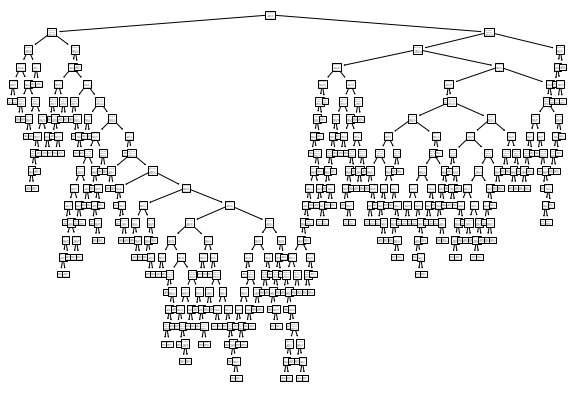

In [22]:
#분류 과정을 시각화해서 보여준다.
#시간이 좀 걸립니다.

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

가지치기

In [23]:
#max_depth=3 (매개변수를 3로 준다 : 로트노투 하나를 제외하고 3개 더 그려줌]

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, Y_train)

print(dt.score(train_scaled, Y_train))
print(dt.score(test_scaled, Y_test))

0.9204980842911877
0.9177820267686424


In [24]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, Y_train)

print(dt.score(X_train, Y_train))
print(dt.score(X_test, Y_test))

0.9204980842911877
0.9177820267686424


In [25]:
#어떤 요인이 크게 작용했는지 볼 수 있음 
print(dt.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.17549601 0.         0.
 0.         0.         0.10959243 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.18684147 0.         0.27345564 0.13766092
 0.11695354 0.         0.         0.         0.        ]


In [26]:
df

,사망,교통사고비용,사고시각_아침,사고시각_오후,사고시각_저녁,일일 교통량,일일 교통량 평균,일일 속도평균,일일 속도75%,고속도로 교통량,...,피해_화물,피해_그외,위험운전행동,주행거리당 사망수,시도별_진료비,연령별_가해진료비,연령별_피해진료비,화물_관용,화물_자가용,화물_영업용
0,0,5245000.0,0,0,1,0.684818,0.461806,0.786667,0.175439,0.393140,...,1,0,0.000000,0.194969,1.000000,0.023318,0.399606,0.091818,0.095142,0.103068
1,0,26225000.0,0,0,1,0.684607,0.500000,0.906667,0.263158,0.535620,...,1,0,0.000000,0.855346,0.794518,0.023318,0.201880,0.404000,0.310168,0.161922
2,0,20980000.0,0,1,0,0.669619,0.583333,0.840000,0.192982,0.569921,...,1,0,0.000000,0.490566,0.425363,0.023318,0.122428,0.432000,0.372638,0.200358
3,0,5245000.0,0,0,0,0.669619,0.593750,0.866667,0.201754,0.089710,...,1,0,0.000000,0.880503,0.291662,0.023318,0.159558,0.503091,0.411119,0.192247
4,0,5245000.0,0,0,1,0.669197,0.614583,0.800000,0.192982,0.994723,...,1,0,0.000000,0.880503,0.291662,0.023318,0.159558,0.502182,0.412677,0.193854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,0,2582700.0,0,1,0,0.670252,0.607639,0.773333,0.201754,0.325858,...,0,1,0.022523,0.264151,0.233429,0.100130,0.000000,0.971818,0.989010,0.965391
2607,0,66502400.0,0,0,0,0.668880,0.482639,0.773333,0.175439,0.325858,...,0,1,0.022523,0.075472,0.397871,0.062355,0.062355,0.195636,0.217672,0.249719
2608,0,5245000.0,1,0,0,0.668880,0.482639,0.773333,0.175439,0.325858,...,0,1,0.022523,0.163522,0.190827,0.100130,0.452580,0.080545,0.070409,0.067215
2609,0,5245000.0,1,0,0,0.670147,0.510417,0.786667,0.192982,0.325858,...,0,1,0.022523,0.163522,0.190827,0.062355,0.062355,0.080545,0.070409,0.067215


In [27]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(X_train, Y_train)

print(dt.score(X_train, Y_train))
print(dt.score(X_test, Y_test))

0.9545019157088123
0.9024856596558317


In [28]:
import pickle

with open('D:/work/python/a-truck-accident/decisionTree.pickle', 'wb') as f: #모델 저장해두기(피클)
    pickle.dump(dt, f)